In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df = pd.read_csv("data\churn_clean.csv")
pd.set_option('display.max_columns', None)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [57]:
# Learning about the dataset
print(df.shape)
df.describe()

(10000, 50)


,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [58]:
# Printing variables types
df.dtypes

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

In [3]:
# Converting Yes/No to 1/0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Techie'] = df['Techie'].map({'Yes': 1, 'No': 0})
df['Port_modem'] = df['Port_modem'].map({'Yes': 1, 'No': 0})
df['Tablet'] = df['Tablet'].map({'Yes': 1, 'No': 0})
df['Phone'] = df['Phone'].map({'Yes': 1, 'No': 0})
df['Multiple'] = df['Multiple'].map({'Yes': 1, 'No': 0})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 0})
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 0})
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 0})
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0})
df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0})
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

In [4]:
# Convert contract to number of months
df['ContractMonths'] = df['Contract'].map({'Month-to-month': 1, 'One year': 12, 'Two Year': 24})

In [5]:
# Converting categories into dummies
cat_vars=['Area','Marital','Gender','PaymentMethod', 'InternetService']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1
cat_vars=['Area','Marital','Gender','PaymentMethod', 'InternetService']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [62]:
pd.set_option('display.max_columns', None)
print(df.shape)
df.head()

(10000, 69)


,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,ContractMonths,Area_Rural,Area_Suburban,Area_Urban,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,InternetService_DSL,InternetService_Fiber Optic,InternetService_None
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,0,7.978323,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4,12,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,1,11.699080,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,0,10.752800,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3,24,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,0,14.913540,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3,24,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,1,8.147417,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0


In [63]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 69 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   CaseOrder                               10000 non-null  int64  
 1   Customer_id                             10000 non-null  object 
 2   Interaction                             10000 non-null  object 
 3   UID                                     10000 non-null  object 
 4   City                                    10000 non-null  object 
 5   State                                   10000 non-null  object 
 6   County                                  10000 non-null  object 
 7   Zip                                     10000 non-null  int64  
 8   Lat                                     10000 non-null  float64
 9   Lng                                     10000 non-null  float64
 10  Population                              10000 non-null  int

In [6]:
# Saving the cleaned set to .csv
df.to_csv("data\churn_cleaned.csv", index = False)

In [7]:
# Select the data for the model
X = df.drop(columns=['Tenure', 'CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'PaymentMethod',
                     'InternetService', 'Contract', 'Area_Rural', 'Marital_Never Married', 'Gender_Nonbinary', 'PaymentMethod_Mailed Check', 'InternetService_None'])
y = df['Tenure']

In [8]:
# Create train/test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [9]:
# Saving train/test splits to files
X_train.to_csv("data\churn_xtrain.csv", index = False)
X_test.to_csv("data\churn_xtest.csv", index = False)
y_train.to_csv("data\churn_ytrain.csv", index = False)
y_test.to_csv("data\churn_ytest.csv", index = False)

In [10]:
# Initialize model
model = RandomForestRegressor(n_jobs=-1)

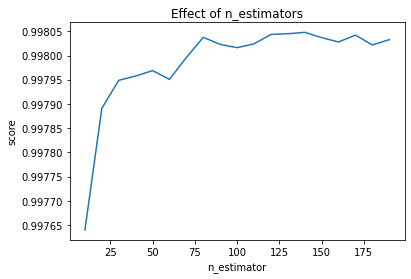

In [11]:
# Try different numbers of n_estimators
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [12]:
# Update model and fit
model = RandomForestRegressor(n_jobs=-1, n_estimators=100, random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [13]:
# Return model metrics
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)

Mean squared error:  1.405449136620223
Root mean squared error:  1.185516400822959


In [71]:
# Return model feature scores
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
pd.set_option('display.max_rows', df.shape[0]+1)
print(feature_scores)

Bandwidth_GB_Year                         0.988564
InternetService_DSL                       0.004665
MonthlyCharge                             0.004005
Age                                       0.000721
Children                                  0.000475
StreamingTV                               0.000151
Income                                    0.000129
Outage_sec_perweek                        0.000122
Population                                0.000120
Email                                     0.000078
InternetService_Fiber Optic               0.000064
StreamingMovies                           0.000049
OnlineSecurity                            0.000043
Item8                                     0.000042
Contacts                                  0.000042
Gender_Male                               0.000041
Item5                                     0.000040
Item6                                     0.000040
Item4                                     0.000039
Item3                          

In [14]:
# Reduce model
X.drop(['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Gender_Male', 'Gender_Female', 'Marital_Widowed', 'Marital_Divorced', 'Marital_Married',
        'Marital_Separated', 'PaymentMethod_Electronic Check', 'PaymentMethod_Bank Transfer(automatic)', 'PaymentMethod_Credit Card (automatic)', 'DeviceProtection',
        'ContractMonths', 'OnlineBackup', 'TechSupport', 'Yearly_equip_failure', 'Multiple', 'Port_modem', 'Area_Suburban', 'Area_Urban', 'Tablet', 'PaperlessBilling',
        'Techie', 'Phone'], axis=1, inplace=True)
X.dtypes

Population                       int64
Children                         int64
Age                              int64
Income                         float64
Churn                            int64
Outage_sec_perweek             float64
Email                            int64
Contacts                         int64
OnlineSecurity                   int64
StreamingTV                      int64
StreamingMovies                  int64
MonthlyCharge                  float64
Bandwidth_GB_Year              float64
InternetService_DSL              uint8
InternetService_Fiber Optic      uint8
dtype: object

In [15]:
# Recreate train/test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [16]:
# Re-saving train/test splits to files
X_train.to_csv("data\churn_xtrain.csv", index = False)
X_test.to_csv("data\churn_xtest.csv", index = False)
y_train.to_csv("data\churn_ytrain.csv", index = False)
y_test.to_csv("data\churn_ytest.csv", index = False)

In [75]:
# Update model and fit
model = RandomForestRegressor(n_jobs=-1, n_estimators=100, random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [76]:
# Return model feature scores
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
pd.set_option('display.max_rows', df.shape[0]+1)
print(feature_scores)

Bandwidth_GB_Year              0.988668
InternetService_DSL            0.004669
MonthlyCharge                  0.004104
Age                            0.000820
Children                       0.000556
Income                         0.000197
Outage_sec_perweek             0.000188
Population                     0.000186
StreamingTV                    0.000174
Email                          0.000124
InternetService_Fiber Optic    0.000081
Contacts                       0.000069
OnlineSecurity                 0.000062
StreamingMovies                0.000061
Churn                          0.000042
dtype: float64


In [77]:
# Return model metrics
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)

Mean squared error:  1.318384178338134
Root mean squared error:  1.1482091178605638
